In [52]:
#Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [53]:
#Load the Dataset
df=pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India (1).csv")
df

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0
...,...,...,...,...,...
9545,Vizaq,Weather,Sunny/Clear,Greviously Injured,561.0
9546,Vizaq,Weather,Sunny/Clear,Minor Injury,252.0
9547,Vizaq,Weather,Sunny/Clear,Persons Killed,176.0
9548,Vizaq,Weather,Sunny/Clear,Total number of Accidents,1207.0


In [54]:
#Finding the null values
df.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [55]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [56]:
#First 5 Rows
df.head()

,Million Plus Cities,Cause category,Cause Subcategory,Outcome of Incident,Count
0,Agra,Traffic Control,Flashing Signal/Blinker,Greviously Injured,0.0
1,Agra,Traffic Control,Flashing Signal/Blinker,Minor Injury,0.0
2,Agra,Traffic Control,Flashing Signal/Blinker,Persons Killed,0.0
3,Agra,Traffic Control,Flashing Signal/Blinker,Total Injured,0.0
4,Agra,Traffic Control,Flashing Signal/Blinker,Total number of Accidents,0.0


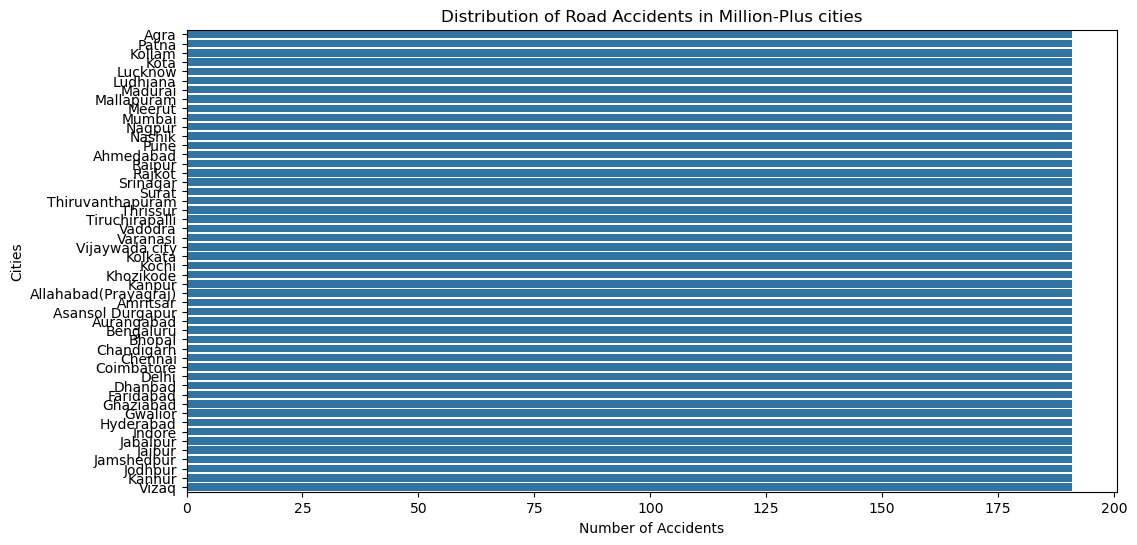

In [80]:
#Distribution of Accident by cities
plt.figure(figsize=(12,6))
sns.countplot(y='Million Plus Cities', data=df,
order=df['Million Plus Cities'].value_counts().index)
plt.title('Distribution of Road Accidents in Million-Plus cities')
plt.xlabel('Number of Accidents')
plt.ylabel('Cities')
plt.show()

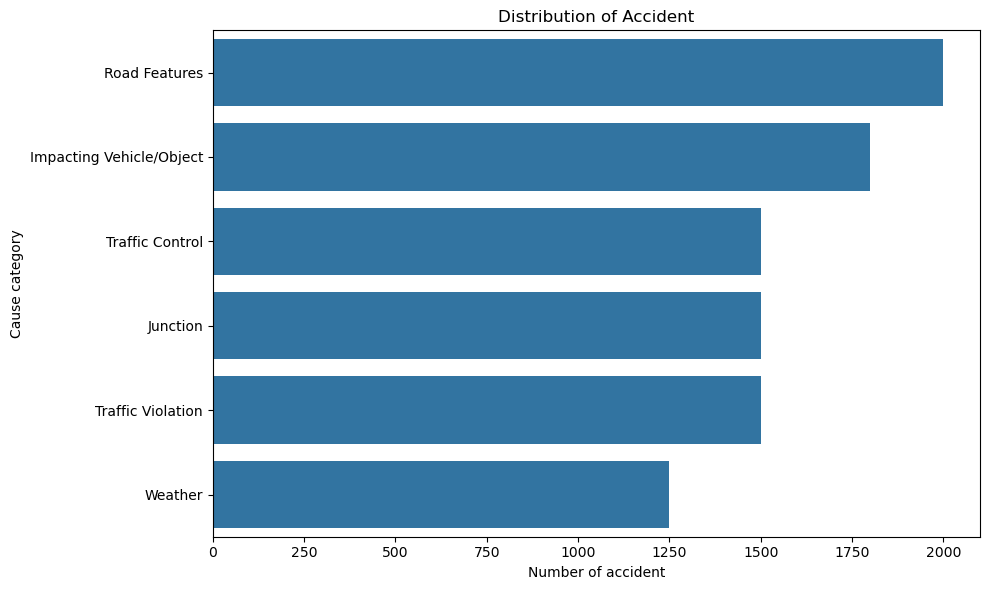

In [84]:
#Analysis of Accident Cause
#Distribution of cause category
plt.figure(figsize=(10,6))
sns.countplot(y='Cause category',data=df,order=df['Cause category'].value_counts().index)
plt.title("Distribution of Accident")
plt.xlabel("Number of accident")
plt.ylabel("Cause category")
plt.tight_layout()
plt.show()

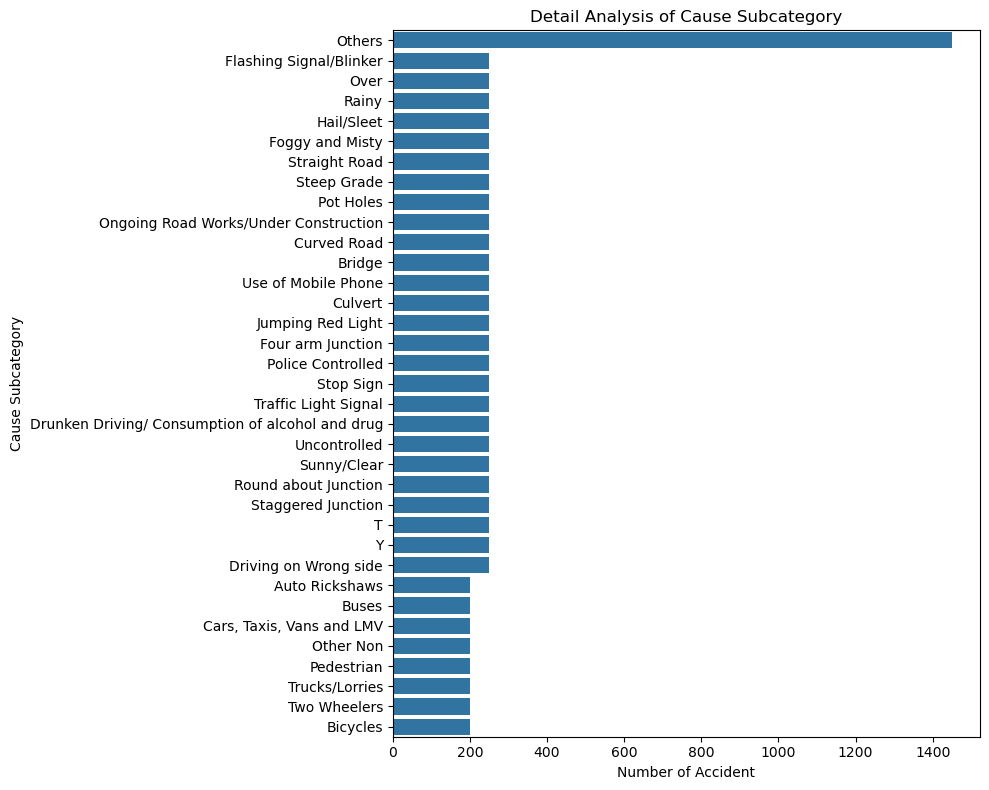

In [86]:
#Detail analysis of cause subcategory
plt.figure(figsize=(10,8))
sns.countplot(y='Cause Subcategory',data=df,order=df['Cause Subcategory'].value_counts().index)
plt.title("Detail Analysis of Cause Subcategory")
plt.xlabel("Number of Accident")
plt.ylabel("Cause Subcategory")
plt.tight_layout()
plt.show()

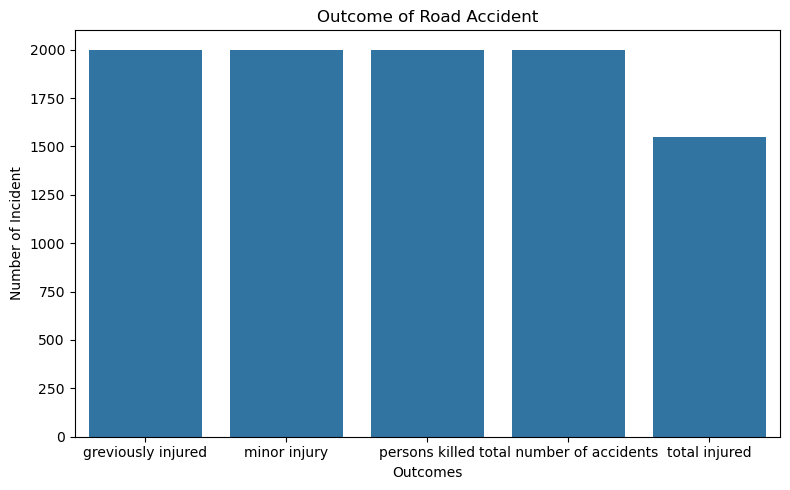

In [90]:
#Outcomes of Incident
plt.figure(figsize=(8,5))
sns.countplot(x="Outcome of Incident",data=df,order=df["Outcome of Incident"].value_counts().index)
plt.title("Outcome of Road Accident")
plt.xlabel("Outcomes")
plt.ylabel("Number of Incident")
plt.tight_layout()
plt.show()


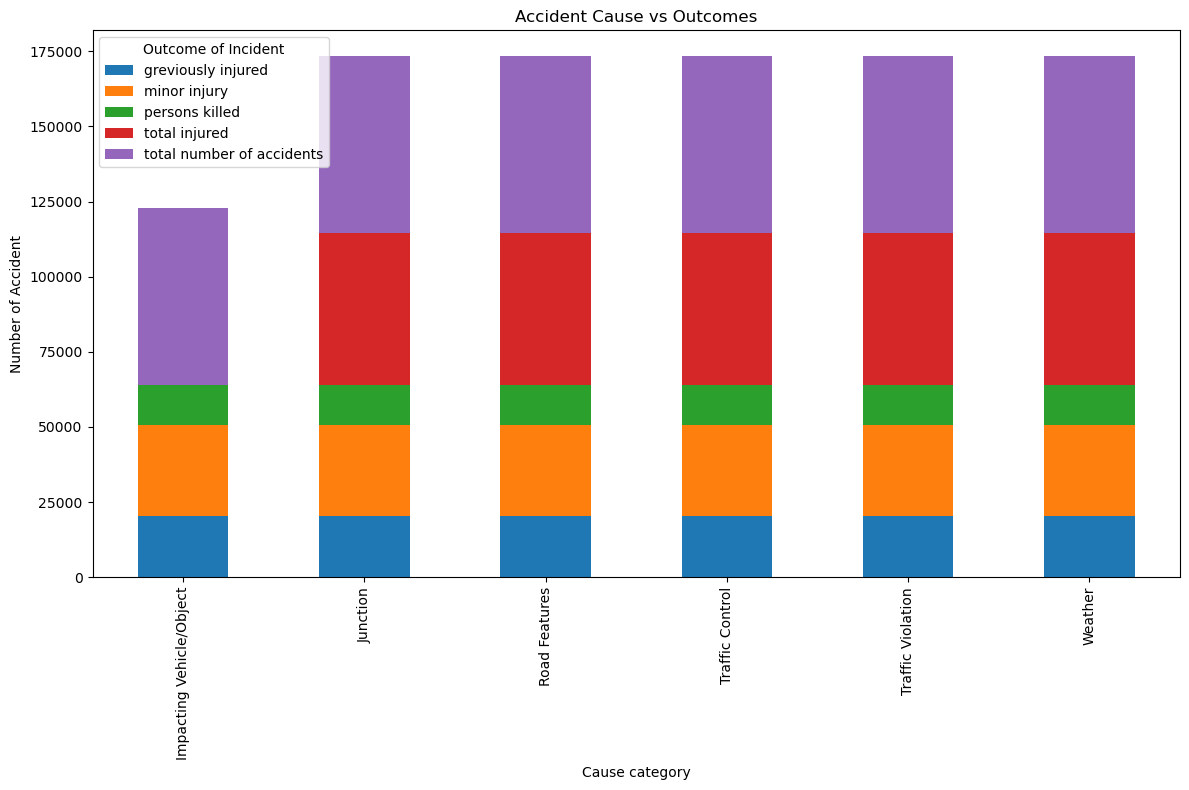

In [98]:
#Accident Cause v/s Outcomes
outcome_vs_cause=df.groupby(["Cause category","Outcome of Incident"])["Count"].sum().unstack(fill_value=0)
outcome_vs_cause.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title("Accident Cause vs Outcomes")
plt.xlabel("Cause category")
plt.ylabel("Number of Accident")
plt.tight_layout()
plt.show()


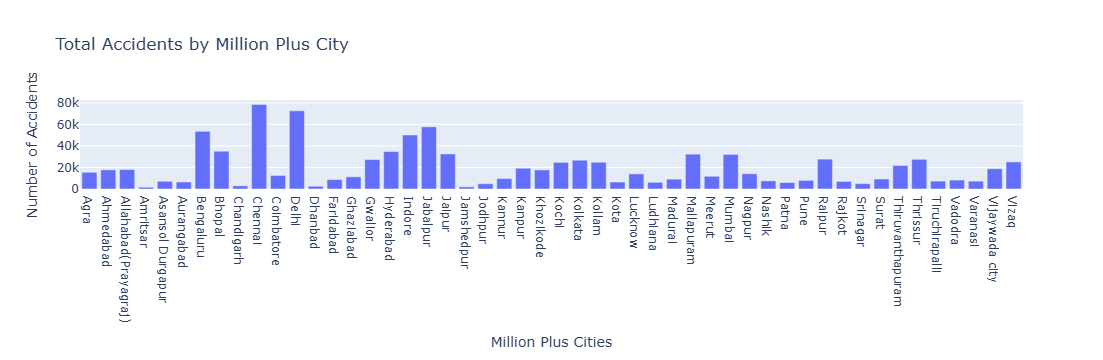

In [116]:
#Accident by Million Plus Cities
city_accidents = df.groupby('Million Plus Cities')['Count'].sum().reset_index()

fig = px.bar(city_accidents, x='Million Plus Cities', y='Count',
             title='Total Accidents by Million Plus City',
             labels={'Count': 'Number of Accidents'})
fig.show()

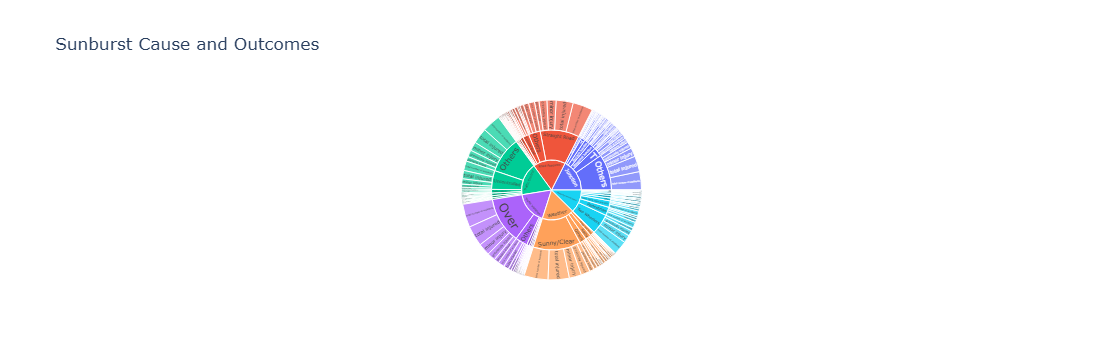

In [120]:
#Sunburst Chart for Cause Category
fig=px.sunburst(df,path=["Cause category","Cause Subcategory","Outcome of Incident"],values="Count",title="Sunburst Cause and Outcomes")
fig.show()

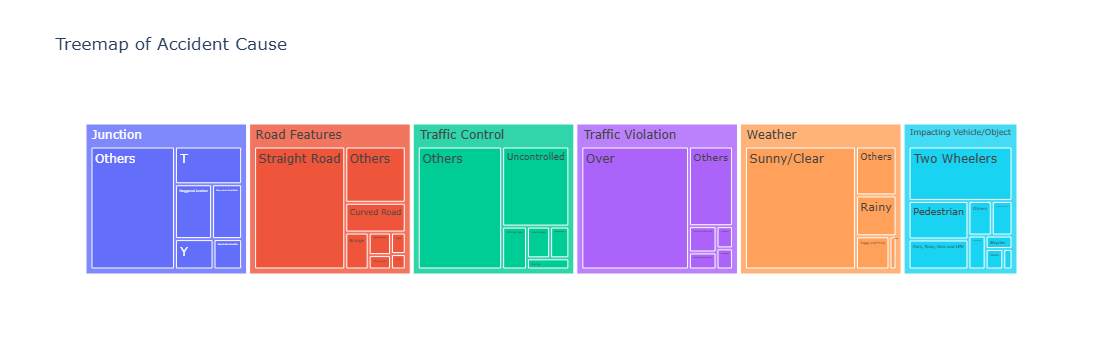

In [134]:
#Tree Map
fig=px.treemap(df,path=['Cause category','Cause Subcategory'], values='Count', title='Treemap of Accident Cause')
fig.show()

In [138]:
#Conclusion
#1) Major Accident Hotspots
#In the Million plus cities, some cities had much higher numbers of accident.
#This Suggests that unbanization, population density, and traffic flow can be major factors behind road accident in metropolitian cities.


#2) Top causes of accident
#The most common cause categories are: Faulty vehicles, Poor road condition
#A closer examination of Cause Subcategories reveals that "Loss of vehicle control" and "Disobeying traffic singnals" are extremely recurring.


#3) Outcome of Accidents
#Most incidents led to fatal or severe injuries, indicating inadequate road safety adherence and absence of emergency response systems.
#The Outcome distribution also emphasizes the importance of first-responder training and faster medical access.